In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv("../dbs/watched_movies_2010s.csv")
trailers = pd.read_csv("../dbs/trailers_2010s.csv")
release_dates = pd.read_csv("../dbs/release_dates_2010s.csv")

In [3]:
trailers = trailers.loc[trailers['similarity_score'] > 0]

In [4]:
def drop_bad_data(trailers):
    # the (?i) tells the contains method to not match case
    # bad_channels = trailers[trailers['channel_title'].str.contains('(?i)vevo|Screen Junkies|PlayStation|Xbox')] # contains VEVO or contians Screen Junkies or PlayStation
    # bad_titles = trailers[trailers['title'].str.contains('(?i)gameplay|music video|xbox| pc|ps4')]
    # bad_data = pd.concat([bad_channels, bad_titles]).drop_duplicates()
    good_data = trailers[trailers['channel_title'].str.contains('(?i)vevo|Screen Junkies|PlayStation|Xbox')==False]
    good_data = good_data[good_data['title'].str.contains('(?i)gameplay|music video|xbox| pc|ps4')==False]
    return good_data

In [5]:
trailers = drop_bad_data(trailers)
trailers.head()

,youtube_id,title,channel_title,channel_id,description,release_date,tags,view_count,like_count,dislike_count,comment_count,tmdb_id,similarity_score
0,zSMHmtaoXtI,The Book of Eli (2010) Official Trailer - Denz...,Movieclips Classic Trailers,UCTCjFFoX1un-j7ni4B6HJ3Q,The Book of Eli (2010) Official Trailer - Denz...,2014-02-08T00:56:40Z,"['movieclips', 'movie clips', 'movieclipstrail...",1850082,6847,358,533,20504,0.401822
1,kAMUv22y1og,"""The Book of Eli"" - Official Trailer [HD HQ]",watchCulturetainment,UCuJXQzdMnQuNGkYJqgIwb-w,"Coming to theatres on January 15, 2010\r\nStar...",2009-08-04T21:39:20Z,"['the', 'book', 'of', 'eli', 'film', 'official...",3326366,4507,322,1982,20504,0.500000
4,GcVja9u9UKA,The Book of Daniel - Official Trailer,Pure Flix,UCUEBVx8KL_IHTJfWYv-J3DA,The Book of Daniel: Taken into slavery after t...,2013-08-19T17:03:46Z,"['The Book of Daniel', 'Christian Trailer', 'C...",4965302,34031,1539,1327,20504,0.403951
5,c-hSjx1PzKU,El Libro De Eli - Trailer Español,Javier Perez,UC09K-LEq5S1290bdF3XstaQ,El Libro De Eli - Trailer Español - www.GranIl...,2010-03-21T13:07:47Z,"['el', 'libro', 'de', 'eli', 'trailer', 'españ...",222943,407,34,9,20504,0.100000
6,1K45RdE2qlk,Valentine's Day (2010) Official Trailer - Juli...,Movieclips Classic Trailers,UCTCjFFoX1un-j7ni4B6HJ3Q,Valentine's Day (2010) Official Trailer - Juli...,2014-02-11T17:19:59Z,"['movieclips', 'movieclipstrailers', 'new trai...",1972376,9846,226,264,32856,0.261818


Rename the columns so we can eliminate confusion

In [6]:
trailers.rename(columns={'title': 'trailer_title', 'release_date': 'trailer_release_date'}, inplace=True)

In [7]:
trailers = trailers.merge(release_dates, on='tmdb_id')
trailers.head()

,youtube_id,trailer_title,channel_title,channel_id,description,trailer_release_date,tags,view_count,like_count,dislike_count,comment_count,tmdb_id,similarity_score,weekday_released,month_released,day_released,year_released
0,zSMHmtaoXtI,The Book of Eli (2010) Official Trailer - Denz...,Movieclips Classic Trailers,UCTCjFFoX1un-j7ni4B6HJ3Q,The Book of Eli (2010) Official Trailer - Denz...,2014-02-08T00:56:40Z,"['movieclips', 'movie clips', 'movieclipstrail...",1850082,6847,358,533,20504,0.401822,Monday,1,11,2010
1,kAMUv22y1og,"""The Book of Eli"" - Official Trailer [HD HQ]",watchCulturetainment,UCuJXQzdMnQuNGkYJqgIwb-w,"Coming to theatres on January 15, 2010\r\nStar...",2009-08-04T21:39:20Z,"['the', 'book', 'of', 'eli', 'film', 'official...",3326366,4507,322,1982,20504,0.500000,Monday,1,11,2010
2,GcVja9u9UKA,The Book of Daniel - Official Trailer,Pure Flix,UCUEBVx8KL_IHTJfWYv-J3DA,The Book of Daniel: Taken into slavery after t...,2013-08-19T17:03:46Z,"['The Book of Daniel', 'Christian Trailer', 'C...",4965302,34031,1539,1327,20504,0.403951,Monday,1,11,2010
3,c-hSjx1PzKU,El Libro De Eli - Trailer Español,Javier Perez,UC09K-LEq5S1290bdF3XstaQ,El Libro De Eli - Trailer Español - www.GranIl...,2010-03-21T13:07:47Z,"['el', 'libro', 'de', 'eli', 'trailer', 'españ...",222943,407,34,9,20504,0.100000,Monday,1,11,2010
4,1K45RdE2qlk,Valentine's Day (2010) Official Trailer - Juli...,Movieclips Classic Trailers,UCTCjFFoX1un-j7ni4B6HJ3Q,Valentine's Day (2010) Official Trailer - Juli...,2014-02-11T17:19:59Z,"['movieclips', 'movieclipstrailers', 'new trai...",1972376,9846,226,264,32856,0.261818,Thursday,2,11,2010


In [8]:
import datetime
def release_timeline(series_object):
    day_movie_released = series_object['day_released']
    month_movie_released = series_object['month_released']
    year_movie_released = series_object['year_released']
    trailer_release_date = series_object['trailer_release_date']
    if year_movie_released > 0:
        movie_release_date_rcf3339 = datetime.datetime(year_movie_released, month_movie_released, day_movie_released)
        trailer_release_date = datetime.datetime.strptime(trailer_release_date, '%Y-%m-%dT%H:%M:%SZ')
        return (movie_release_date_rcf3339 - trailer_release_date).days
    return datetime.timedelta().days

In [9]:
trailers['release_date_difference'] = trailers.apply(release_timeline, axis=1)

In [10]:
trailers = trailers.loc[((trailers['release_date_difference'] > 0) & (trailers['release_date_difference'] < 365))]
trailers.head()

,youtube_id,trailer_title,channel_title,channel_id,description,trailer_release_date,tags,view_count,like_count,dislike_count,comment_count,tmdb_id,similarity_score,weekday_released,month_released,day_released,year_released,release_date_difference
1,kAMUv22y1og,"""The Book of Eli"" - Official Trailer [HD HQ]",watchCulturetainment,UCuJXQzdMnQuNGkYJqgIwb-w,"Coming to theatres on January 15, 2010\r\nStar...",2009-08-04T21:39:20Z,"['the', 'book', 'of', 'eli', 'film', 'official...",3326366,4507,322,1982,20504,0.500000,Monday,1,11,2010,159
7,gPmMkDaEJUw,Valentine's Day Trailer,Warner Bros NL,UCtS8hD5lhZTgHZAKeD89CFA,Valentine's Day draait vanaf 11 februari in de...,2010-02-08T09:51:12Z,"[""Valentine's Day"", 'Valentine', 'Valentijnsda...",117902,112,14,11,32856,0.411290,Thursday,2,11,2010,2
10,5iaYLCiq5RM,"""Shutter Island"" - Official Trailer [HD]",watchCulturetainment,UCuJXQzdMnQuNGkYJqgIwb-w,"For even darker trailers, visit now http://www...",2009-10-16T10:40:12Z,"['shutter', 'island', 'film', 'movie', 'offici...",11618472,43123,1015,5309,11324,0.534921,Thursday,2,18,2010,124
12,t0irhIPypLY,Shutter Island Trailer HD,GavsTrailers,UCEMZ7b75GBKVhaMdU_i0Mlw,Great movie news and blogs at... http://www.sq...,2009-10-03T21:24:52Z,"['shutter', 'island', 'leanardo', 'di', 'caprio']",553,0,0,0,11324,0.463265,Thursday,2,18,2010,137
16,xko1Mx5w4tg,Percy Jackson & the Olympians: The Lightning T...,vuk vucko,UC1anlenXp6oHQA1M_BVWCfQ,"It's the 21st century, but the gods of Mount O...",2009-11-24T06:08:07Z,"['Percy', 'Jackson', 'the', 'Olympians:', 'The...",6868615,17149,1296,6430,32657,0.499351,Thursday,2,11,2010,78


## Apply Grouping on Trailers Data

In [11]:
trailers = trailers.groupby(['tmdb_id', 'weekday_released', 'day_released', 'month_released', 'year_released']).sum().drop(columns=['similarity_score', 'release_date_difference'])
trailers.head()

,,,,,view_count,like_count,dislike_count,comment_count
tmdb_id,weekday_released,day_released,month_released,year_released,,,,
189,Friday,22,8,2014,9997365,30385,1943,2790
1771,Friday,22,7,2011,13296177,65271,1571,8698
1865,Friday,20,5,2011,19923292,56913,1563,11038
1930,Tuesday,3,7,2012,21112870,74661,7717,26514
9543,Thursday,27,5,2010,6151541,13884,682,1470


Now we have the total of views, likes, dislikes, and comments for each movie's trailer(s)

In [12]:
movies = movies.merge(trailers, on='tmdb_id')
print(movies.shape)
movies.head()

(650, 17)


,movie_id,title,genres,imdb_id,tmdb_id,year,budget,vote_count,vote_average,revenue,runtime,popularity,overview,view_count,like_count,dislike_count,comment_count
0,73321,The Book of Eli,Action|Adventure|Drama,1037705,20504,2010,80000000.0,4303.0,6.7,157107755.0,118.0,24.843,"A post-apocalyptic tale, in which a lone man f...",3326366,4507,322,1982
1,74450,Valentine's Day,Comedy|Romance,817230,32856,2010,52000000.0,2323.0,5.9,216485654.0,125.0,16.444,More than a dozen Angelenos navigate Valentine...,117902,112,14,11
2,74458,Shutter Island,Drama|Mystery|Thriller,1130884,11324,2010,80000000.0,16456.0,8.2,294804195.0,138.0,35.806,World War II soldier-turned-U.S. Marshal Teddy...,11619025,43123,1015,5309
3,74530,Percy Jackson & the Olympians: The Lightning T...,Adventure|Fantasy,814255,32657,2010,95000000.0,5399.0,6.2,226497209.0,119.0,44.193,"Accident prone teenager, Percy discovers he's ...",7424212,18935,1421,6705
4,74688,Dear John,Drama|Romance|War,989757,22971,2010,25000000.0,3226.0,6.8,114977104.0,115.0,19.448,While Sergeant John Tyree is home on two weeks...,12783196,43389,970,4492


In [13]:
movies.duplicated().sum()

0

## How is our data disributed across the decade?

In [14]:
years_count = movies['year'].value_counts().sort_index()
years_count

2010    48
2011    59
2012    65
2013    87
2014    72
2015    72
2016    86
2017    71
2018    55
2019    35
Name: year, dtype: int64

Text(0.5, 1.0, 'Number of films from each year in the decade')

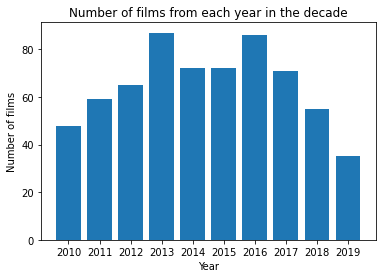

In [15]:
years = labels = np.array(years_count.index.tolist())
count_by_year = np.array(years_count.values.tolist())
plt.bar(labels, count_by_year, align='center')
plt.xticks(labels, years)
plt.xlabel("Year")
plt.ylabel("Number of films")
plt.title("Number of films from each year in the decade")

## Prepare Data for Models

Before we do anything, we need to encode those genres.

In [16]:
genre_list = set()
def count_genres(genre_column, genres=genre_list):
    for val in genre_column:
        for genre in val.split("|"):
            genre_list.add(genre.lower())
    return genre_list

In [17]:
count_genres(movies['genres'].values)

{'(no genres listed)',
 'action',
 'adventure',
 'animation',
 'children',
 'comedy',
 'crime',
 'drama',
 'fantasy',
 'film-noir',
 'horror',
 'imax',
 'musical',
 'mystery',
 'romance',
 'sci-fi',
 'thriller',
 'war',
 'western'}

In [18]:
def create_genre_columns(df, genres):
    for genre in genres:
        df[genre] = pd.Series(np.zeros(len(df), dtype='int32'), index=df.index)
    return df

In [19]:
movies = create_genre_columns(movies, list(genre_list))
movies.columns

Index(['movie_id', 'title', 'genres', 'imdb_id', 'tmdb_id', 'year', 'budget',
       'vote_count', 'vote_average', 'revenue', 'runtime', 'popularity',
       'overview', 'view_count', 'like_count', 'dislike_count',
       'comment_count', 'film-noir', 'mystery', 'action', 'imax', 'sci-fi',
       'romance', 'musical', 'comedy', 'war', 'crime', 'children', 'fantasy',
       'horror', 'drama', 'western', 'adventure', 'animation', 'thriller',
       '(no genres listed)'],
      dtype='object')

### Now let's encode those genres

In [20]:
def encode_genre(series_object):
    genres = series_object['genres'].split("|")
    for genre in genres:
        series_object[genre.lower()] = 1
    return series_object

In [21]:
movies = movies.apply(encode_genre, axis=1)

### Only keep what we need

In [22]:
movies = movies.drop(columns=['genres', 'movie_id', 'imdb_id', 'overview', '(no genres listed)'])
movies.head()

,title,tmdb_id,year,budget,vote_count,vote_average,revenue,runtime,popularity,view_count,...,war,crime,children,fantasy,horror,drama,western,adventure,animation,thriller
0,The Book of Eli,20504,2010,80000000.0,4303.0,6.7,157107755.0,118.0,24.843,3326366,...,0,0,0,0,0,1,0,1,0,0
1,Valentine's Day,32856,2010,52000000.0,2323.0,5.9,216485654.0,125.0,16.444,117902,...,0,0,0,0,0,0,0,0,0,0
2,Shutter Island,11324,2010,80000000.0,16456.0,8.2,294804195.0,138.0,35.806,11619025,...,0,0,0,0,0,1,0,0,0,1
3,Percy Jackson & the Olympians: The Lightning T...,32657,2010,95000000.0,5399.0,6.2,226497209.0,119.0,44.193,7424212,...,0,0,0,1,0,0,0,1,0,0
4,Dear John,22971,2010,25000000.0,3226.0,6.8,114977104.0,115.0,19.448,12783196,...,1,0,0,0,0,1,0,0,0,0


Let's rearrange our columns so the last index is what we want to predict.

In [23]:
columns = movies.columns.tolist()

In [24]:
columns = columns[:6] + columns[7:] + [columns[6]]
columns

['title',
 'tmdb_id',
 'year',
 'budget',
 'vote_count',
 'vote_average',
 'runtime',
 'popularity',
 'view_count',
 'like_count',
 'dislike_count',
 'comment_count',
 'film-noir',
 'mystery',
 'action',
 'imax',
 'sci-fi',
 'romance',
 'musical',
 'comedy',
 'war',
 'crime',
 'children',
 'fantasy',
 'horror',
 'drama',
 'western',
 'adventure',
 'animation',
 'thriller',
 'revenue']

In [25]:
movies = movies[columns]
movies.to_csv("../dbs/data_2010s.csv", index=False)

# Build the Model

Go build it!